In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import MinuteLocator, DateFormatter
from onc import ONC

# Import common code from the python-community-notebooks repository.
from pcn_common import get_onc_token_from_netrc,format_datetime, convert_scalar_data

In [2]:
token = get_onc_token_from_netrc(machine = 'data.oceannetworks.ca')
onc = ONC(token = token)

In [3]:
date_from = datetime(2025,11,3,19,15,0)
date_to = datetime(2025,11,3,20,15,0)

params = {'locationCode': 'TWSB',
          'deviceCategoryCode': 'TSG',
          'qualityControl': 'clean',
          'dateFrom': format_datetime(date_from),
          'dateTo': format_datetime(date_to),
          'fillGaps': False}
json_response = onc.getScalardata(filters = params, allPages=True)
ds = convert_scalar_data(json_response_data=json_response, out_as = 'xarray')

Text(0.5, 1.0, 'TWSB | TSG')

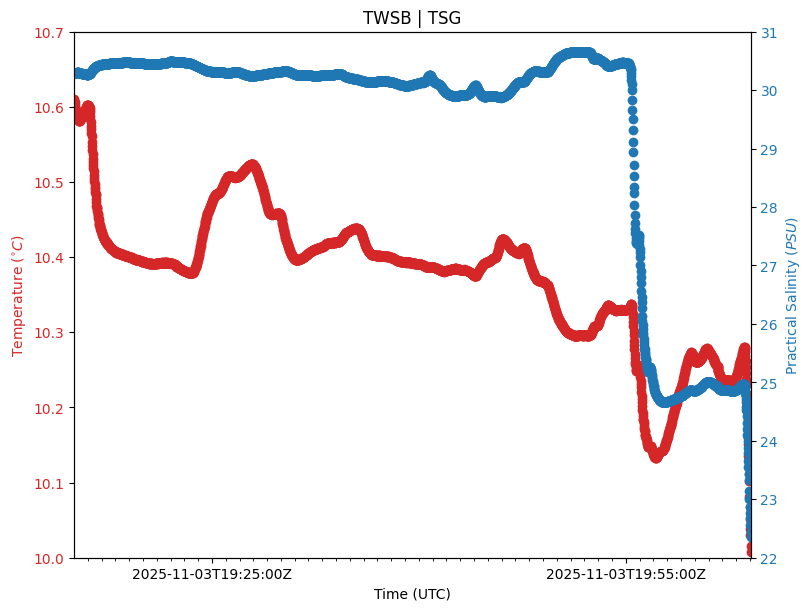

In [4]:
fig, ax = plt.subplots(1,1, figsize = (8,6), constrained_layout = True)
ax2 = ax.twinx()

ax.scatter(ds.time, ds.temperature, color = 'tab:red')
ax2.scatter(ds.time, ds.practical_salinity, color = 'tab:blue')

ax.set_xlabel('Time (UTC)')
ax.set_xlim(ds.time.min(), ds.time.max())
ax.xaxis.set_major_locator(MinuteLocator(interval = 30))
ax.xaxis.set_minor_locator(MinuteLocator(interval = 1))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%dT%H:%M:%SZ'))

ax.set_ylabel(r'Temperature ($^{\circ}C$)', color = 'tab:red')
ax.tick_params(axis='y', labelcolor='tab:red')
ax.set_ylim(10,10.7)

ax2.set_ylabel(r'Practical Salinity ($PSU$)', color = 'tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(22,31)

ax.set_title('TWSB | TSG')